In [ ]:
import math
import os
from tensorflow import keras
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/dataset_ML - Sheet1.csv')

In [ ]:
df.describe()

,speed,load,time,cf
count,3230.000000,3230.000000,3230.000000,3230.000000
mean,778.173375,11.668731,499.982615,0.300914
std,248.445912,4.806750,354.141716,0.111396
min,500.000000,5.000000,0.000000,0.000390
25%,500.000000,10.000000,200.763750,0.239162
50%,1000.000000,10.000000,495.792500,0.310763
75%,1000.000000,15.000000,732.232500,0.391873
max,1000.000000,20.000000,1500.110000,0.511881


In [ ]:
df.load.unique()

array([ 5, 10, 15, 20])

cf = coefficient of friction

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3230 entries, 0 to 3229
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   speed   3230 non-null   int64  
 1   load    3230 non-null   int64  
 2   time    3230 non-null   float64
 3   cf      3230 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 101.1 KB


In [ ]:
df.isna().sum()

speed    0
load     0
time     0
cf       0
dtype: int64

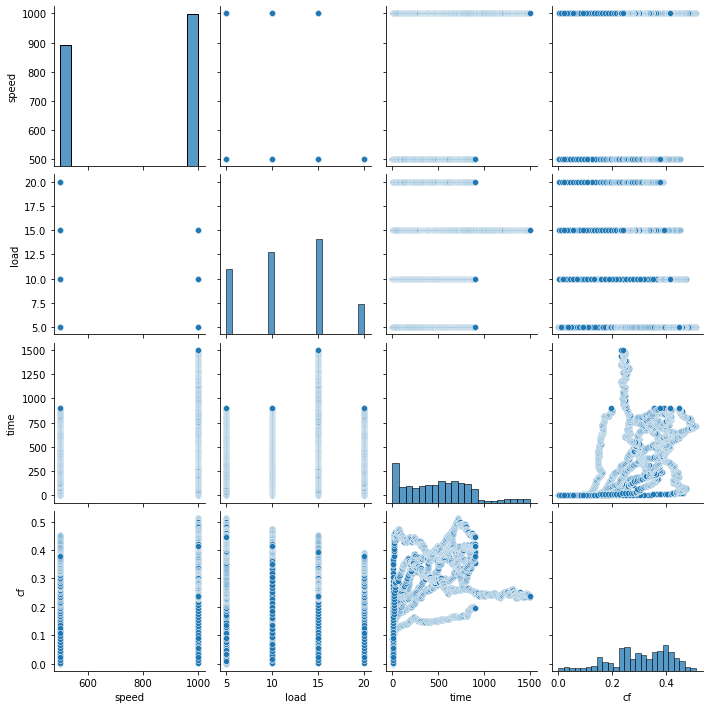

In [ ]:
sns.pairplot(df)

In [ ]:
df.head()

,speed,load,time,cf
0,500,5,0.00000,0.026548
1,500,5,1.67903,0.000390
2,500,5,1.74218,0.001865
3,500,5,2.34285,0.003384
4,500,5,2.67034,0.006485


In [ ]:
x = df[['speed',	'load',	'time']]
y = df['cf'].values.reshape(-1, 1)
print(f"x shape{x.shape}")
print(f"y shape{y.shape}")

x shape(3230, 3)
y shape(3230, 1)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42) # 80% data for training the model

X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) # 10% data for testing and validation

In [ ]:
print(f"x train shape{X_train.shape}")
print(f"y train shape{y_train.shape}")
print(f"x test shape{X_test.shape}")
print(f"y test shape{y_test.shape}")
print(f"x val shape{X_val.shape}")
print(f"y val shape{y_val.shape}")

x train shape(2584, 3)
y train shape(2584, 1)
x test shape(323, 3)
y test shape(323, 1)
x val shape(323, 3)
y val shape(323, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [ ]:
model = Sequential([

tf.keras.layers.InputLayer(3,),
Dense(512,activation='relu'),
Dense(512,activation='relu'),
Dense(512,activation='relu'),
Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               2048      
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 527,873
Trainable params: 527,873
Non-trainable params: 0
_________________________________________________________________


In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='mean_squared_error', optimizer=opt)

In [ ]:
history = model.fit(x=X_train,y=y_train,epochs=300,validation_data=(X_val,y_val))

Epoch 1/300
81/81 [==============================] - 1s 8ms/step - loss: 0.0148 - val_loss: 0.0016
Epoch 2/300
81/81 [==============================] - 0s 6ms/step - loss: 0.0017 - val_loss: 9.7091e-04
Epoch 3/300
81/81 [==============================] - 0s 6ms/step - loss: 0.0014 - val_loss: 8.2968e-04
Epoch 4/300
81/81 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 6.7341e-04
Epoch 5/300
81/81 [==============================] - 1s 7ms/step - loss: 0.0013 - val_loss: 6.7760e-04
Epoch 6/300
81/81 [==============================] - 1s 6ms/step - loss: 0.0012 - val_loss: 5.7788e-04
Epoch 7/300
81/81 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 7.4257e-04
Epoch 8/300
81/81 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 5.8573e-04
Epoch 9/300
81/81 [==============================] - 1s 6ms/step - loss: 9.9706e-04 - val_loss: 4.9961e-04
Epoch 10/300
81/81 [==============================] - 1s 6ms/step - loss:

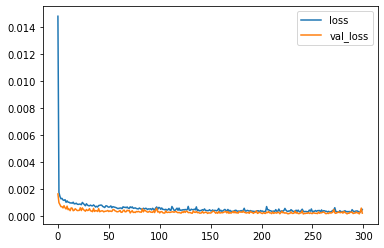

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_test[20:28] #actual values

array([[0.233151],
       [0.196549],
       [0.241419],
       [0.32381 ],
       [0.25732 ],
       [0.150419],
       [0.244663],
       [0.244954]])

In [ ]:
y_pred[20:28] #predicted values

array([[0.23038526],
       [0.19801266],
       [0.2467664 ],
       [0.3261724 ],
       [0.2654072 ],
       [0.15177236],
       [0.25368863],
       [0.24693394]], dtype=float32)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [ ]:
r2 = r2_score(y_test,y_pred)
print(f"R2 score ",r2)
print(f"Mean sqaured errror {mean_squared_error(y_test,y_pred)}")
print("RMSE ",np.log(np.sqrt(mean_squared_error(y_test,y_pred))))
print("MAE ",mean_absolute_error(y_test,y_pred))

print(f"Y_test mean {y_test.mean()}")
print(f"Y_pred mean {y_pred.mean()}")

R2 score  0.9782175238732959
Mean sqaured errror 0.0002777048180822012
RMSE  -4.094475906924059
MAE  0.010072722093608107
Y_test mean 0.2917743345510836
Y_pred mean 0.29497018456459045


In [ ]:
# Save the entire model as a SavedModel.
path = '/content/drive/MyDrive/Colab Notebooks/saved model/cf_model_v1.h5'
# new_model = model.save(path) 
new_model_loaded = tf.keras.models.load_model(path)

# Check its architecture
new_model_loaded.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               2048      
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 527,873
Trainable params: 527,873
Non-trainable params: 0
_________________________________________________________________


In [ ]:
test_df = pd.read_csv('/content/test data for prediction.csv')

In [ ]:
test_df.describe()

,speed,load,time
count,10.000000,10.000000,10.000000
mean,750.000000,8.500000,501.460930
std,263.523138,4.116363,269.070694
min,500.000000,5.000000,83.305300
25%,500.000000,5.000000,315.768250
50%,750.000000,7.500000,481.900000
75%,1000.000000,10.000000,740.717500
max,1000.000000,15.000000,853.218000


In [ ]:
test_df.shape 

(10, 3)

In [ ]:
# pred_new = np.array([[500,15,583.3]])

pred_new = scaler.transform(test_df)
new_model_loaded.predict(pred_new).round(4)

array([[0.2097],
       [0.4026],
       [0.1731],
       [0.2501],
       [0.3451],
       [0.4097],
       [0.3257],
       [0.1353],
       [0.4882],
       [0.4934]], dtype=float32)

In [ ]:
new_model_loaded.predict([[1000,5,754]])

array([[148.99721]], dtype=float32)

In [ ]:
y_pred = new_model_loaded.predict(X_test)

In [ ]:
r2 = r2_score(y_test,y_pred)
print(f"R2 score ",r2)
print(f"Mean sqaured errror {mean_squared_error(y_test,y_pred)}")
print("RMSE ",np.log(np.sqrt(mean_squared_error(y_test,y_pred))))
print("MAE ",mean_absolute_error(y_test,y_pred))

print(f"Y_test mean {y_test.mean()}")
print(f"Y_pred mean {y_pred.mean()}")

R2 score  0.9821381757169353
Mean sqaured errror 0.00022772042233819574
RMSE  -4.19369594962249
MAE  0.0071219360541814325
Y_test mean 0.2917743345510836
Y_pred mean 0.2924346625804901
